In [1]:
from tools import dem_from_mml, delineate_catchment_from_dem, fill_cmask_holes, resample_raster
from tools import burn_water_dem, rasterize_shapefile
import pandas as pd
import numpy as np

# inputs parameters
#subset = [370000,7537500,390000,7557500] # coordinate box of the dem, Whole Pallasjärvi catchment
subset = [382000,7541000,386000,7546000] # coordinate box of the dem, LJO Catchment

apifile = r'/Users/jpnousu/Pallas_Catchments/apikey.txt' # api-key for MML database (registration needed)
apikey = np.loadtxt(apifile, dtype='str') # api-key loaded from a txt-file

# reading stream outlet file
streams_file = '/Users/jpnousu/Pallas_Catchments/data/streams/tributaries_16m.csv'
streams = pd.read_csv(streams_file, sep=';', usecols=['stream'], encoding = "ISO-8859-1")['stream'].to_list()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


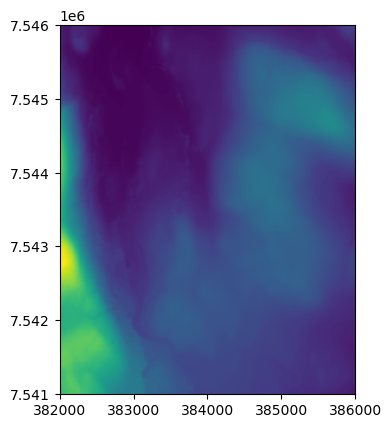

In [6]:
# output file directory
out_fd = r'/Users/jpnousu/Pallas_Catchments/data/dem_16/'
# scalefactor = 0.125 -> 16m dem
# scalefactor = 0.5 -> 4m dem
dem, out_fp = dem_from_mml(out_fd,
                           subset, 
                           apikey=apikey,
                            scalefactor=0.125)

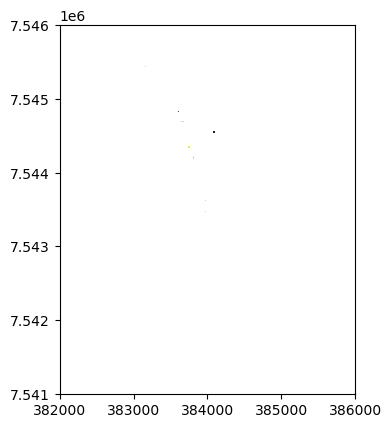

In [3]:
file1 = r'/Users/jpnousu/Pallas_Catchments/data/streams/stream_and_distches_modified.shp'
out_fp1 = r'/Users/jpnousu/Pallas_Catchments/data/streams/streams_and_ditches.asc'

rasterize_shapefile(shapefile=file1, burn_field='KULKUTAPA', subset=None, out_fp=out_fp1, ref_raster=out_fp, plot=True, save_in='asc')

#### Burn water elements to dem

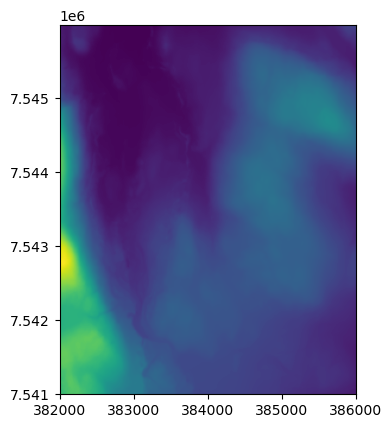

In [4]:
stream = r'/Users/jpnousu/Pallas_Catchments/data/streams/streams_and_ditches.asc'
dem_fp = r'/Users/jpnousu/Pallas_Catchments/data/dem_16/korkeusmalli_16m.asc'
fdem, out_fp = burn_water_dem(dem_fp=dem_fp, stream_fp=stream)

#### Delineate catchment


*** Delineating 0 catchment ***
*** 0 catchment is delineated and DEM derivatives are saved ***

*** Delineating 1 catchment ***
*** 1 catchment is delineated and DEM derivatives are saved ***

*** Delineating 2 catchment ***
*** 2 catchment is delineated and DEM derivatives are saved ***


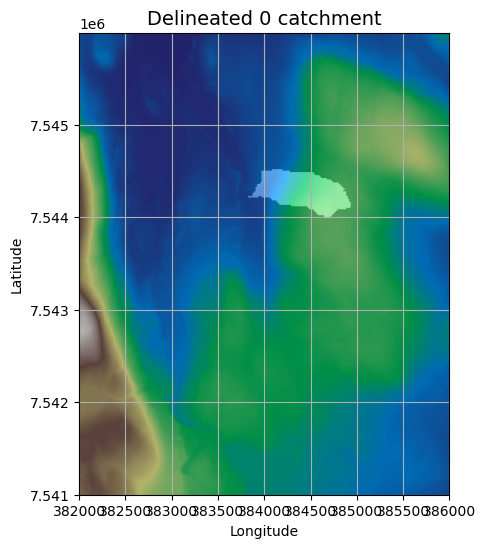

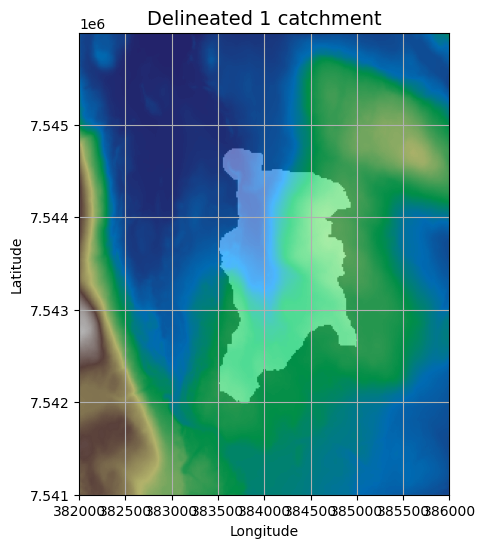

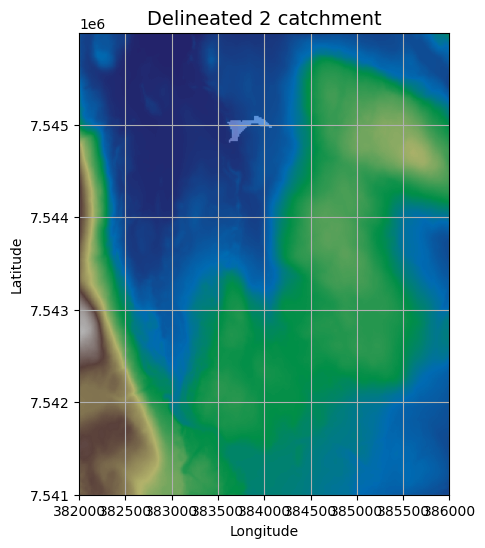

In [5]:
streams_file = '/Users/jpnousu/Pallas_Catchments/data/streams/tributaries_16m.csv'
streams = pd.read_csv(streams_file, sep=';', usecols=['stream'], encoding = "ISO-8859-1")['stream'].to_list()

for catchment_name in streams:
    delineate_catchment_from_dem(dem_path=out_fp,
                                 catchment_name=catchment_name,
                                 out_fd=out_fd,
                                 outlet_file=streams_file,
                                 routing='d8',
                                 clip_catchment=False,
                                 fill_holes=True)